Notebook para analizar las curvas de luz obtenidas:

In [29]:
import numpy as num
import matplotlib.pyplot as plt
from astropy.io import ascii
import cc_transits
import os
import sys

In [50]:
PARAM_FILE = "LP791-18b_TA.par"

In [51]:
par = cc_transits.read_paramfile(PARAM_FILE)
target       = par.target
instrument = par.instrument
obsdate    = par.obsdate
selec      = par.selec
dir_imgs = "../imagenes/%s/%s"%(instrument,obsdate)
dir_cal  = "%s/calibrated/%s/%s"%(dir_imgs, target, selec)
dir_phot = "../photometry/%s/%s/%s/%s"%(instrument,obsdate,target,selec)


Opening parameter file LP791-18b_TA.par


Read 449 photometry points


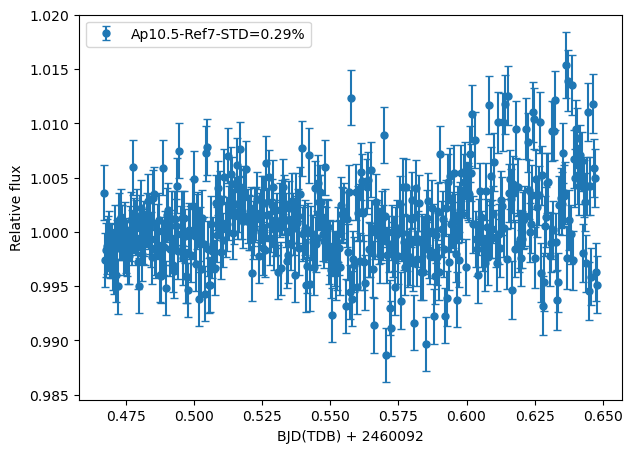

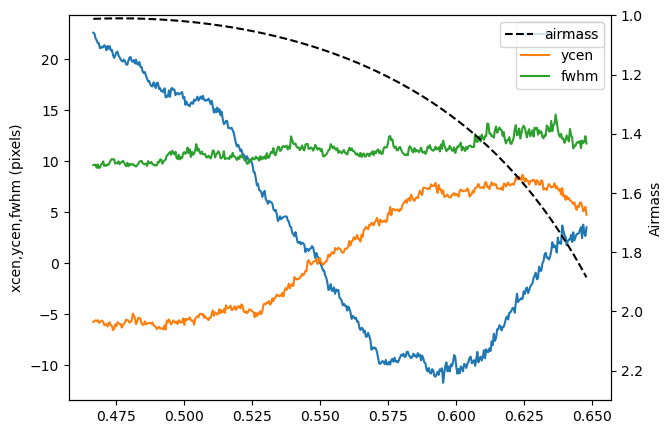

In [52]:
AP = [10.0, 10.5, 11.0, 11.5, 12.0, 13.0, 14.0]   # Array of apertures to plot
REF = [7,4,3]    # Array of reference stars to plot
AP = [10.5]   # Array of apertures to plot
REF = [7]    # Array of reference stars to plot
fig1 = plt.figure(figsize=(7,5))
fig2 = plt.figure(figsize=(7,5))
ax1 = fig1.add_subplot(111)
ax2 = fig2.add_subplot(111)
ax3 = ax2.twinx()
#ax4 = ax2.twinx()
for i in range(len(AP)):
    pars_file = "%s/parameters_star%d.dat"%(dir_phot,0)
    for j in range(len(REF)):
        phot_file = "%s/lightcurves_ap%.1f.dat"%(dir_phot,AP[i])
        #pars_file = "%s/parameters_star%d.dat"%(dir_phot,REF[j])
        phot = num.loadtxt(phot_file)
        pars = ascii.read(pars_file)
        t0 = phot[0,0]
        t = phot[:,1]
        f = phot[:,1+2*REF[j]-1]
        df = phot[:,1+2*REF[j]]
        ibl = t < 0.52
        f_norm = num.median(f[ibl])
        f_std = num.std(f[ibl])
        f /= f_norm
        npoints = len(phot)
        print("Read %d photometry points"%npoints)
        #ax.plot(t,f, '.', label="Ap%.1f-Ref%d-STD=%.2f%%"%(AP[i],REF[j],f_std*1.0e2))
        ax1.errorbar(t,f, yerr=df, fmt='o', capsize=3, ms=5, label="Ap%.1f-Ref%d-STD=%.2f%%"%(AP[i],REF[j],f_std*1.0e2))
        ax1.set_xlabel("BJD(TDB) + %.0f"%t0)
        ax1.set_ylabel("Relative flux")
ax2.plot(t,pars['xcen']-pars['xcen'].mean()+3.0, label="xcen")
ax2.plot(t,pars['ycen']-pars['ycen'].mean()+1.0, label="ycen")
ax2.set_ylabel("xcen,ycen,fwhm (pixels)")
ax2.plot(t,pars['fwhm'], label="fwhm")
ax3.plot(t,pars['airmass'], '--k', label="airmass")
ax3.set_ylabel("Airmass")
ax3.set_ylim(2.3, 1)
ax1.legend()
ax2.legend()
ax3.legend()